# Marketing Analytics Homework 1
## Ani Gharibyan
##



### 2025 innovation: Bose Ultra Open Earbuds - All-Day HeadphonesSimilar 
### Innovation from Past: Apple AirPods.

The Bose Ultra Open Earbuds represent an innovation in the wireless earbuds category with their unique open-ear design that doesn't block the ear canal. Apple AirPods serve as an excellent comparison product because they similarly disrupted the wireless audio market when introduced in 2017. Both products transformed how consumers interact with audio technology by eliminating wires and offering convenient, portable listening experiences. While AirPods focused on traditional in-ear design with noise isolation, Bose's innovation takes a different approach with its open-ear design, targeting users who want environmental awareness while listening. Both products target similar demographics of tech-savvy consumers and rely on Bluetooth technology, making AirPods' adoption patterns valuable for predicting the diffusion of Bose's new product.



In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read the file
file_path = "/Users/ani/Desktop/BassModel_hw/data/Airpods_Sales.xlsx"

# Read the file
airpods_data = pd.read_excel(file_path)

# Print first few rows
print(airpods_data.head())



   Year  Unit Sales (in millions)
0  2017                        15
1  2018                        35
2  2019                        60
3  2020                       114
4  2021                        85


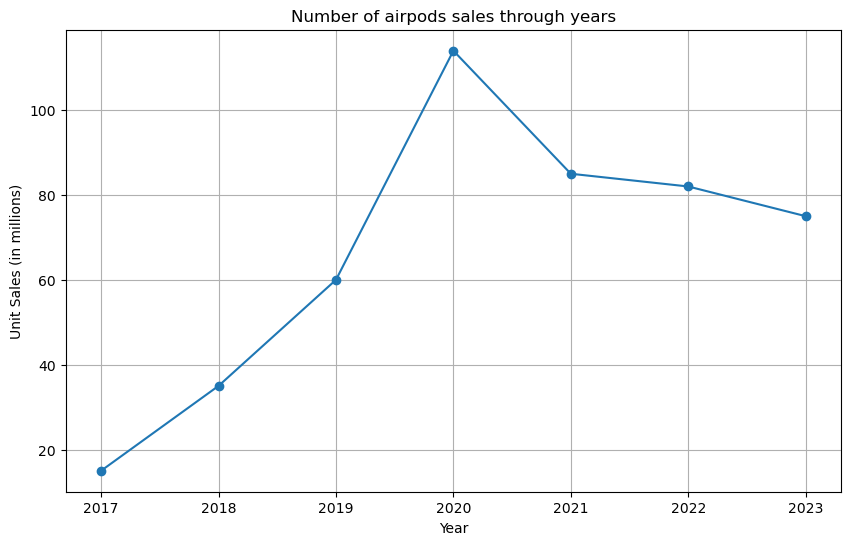

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(airpods_data['Year'], airpods_data['Unit Sales (in millions)'], marker='o')
plt.title('Number of airpods sales through years')
plt.xlabel('Year')
plt.ylabel('Unit Sales (in millions)')
plt.grid(True)
plt.show()

In [59]:
# Define the Bass Model Function
def bass_model(t, p, q, M):
    """Bass Diffusion Model"""
    return (M * (p + q)**2 * np.exp(-(p + q) * t)) / ((p + q * np.exp(-(p + q) * t))**2)

# Normalize the years (start from year 0)
airpods_data['Year'] -= airpods_data['Year'].min()

#Estimate parameters using curve fitting
initial_guess = [0.03, 0.38, 160]  # Initial values for p, q, and M (M in millions)
params, _ = opt.curve_fit(bass_model, airpods_data['Year'], airpods_data['Unit Sales (in millions)'], p0=initial_guess)

# Extract estimated parameters
p, q, M = params
print("\nBass Model Parameters for Apple AirPods:")
print(f"p (coefficient of innovation): {p:.4f}")
print(f"q (coefficient of imitation): {q:.4f}")
print(f"M (market potential in millions): {M:.2f}")


Bass Model Parameters for Apple AirPods:
p (coefficient of innovation): 0.0409
q (coefficient of imitation): 0.6590
M (market potential in millions): 22.22


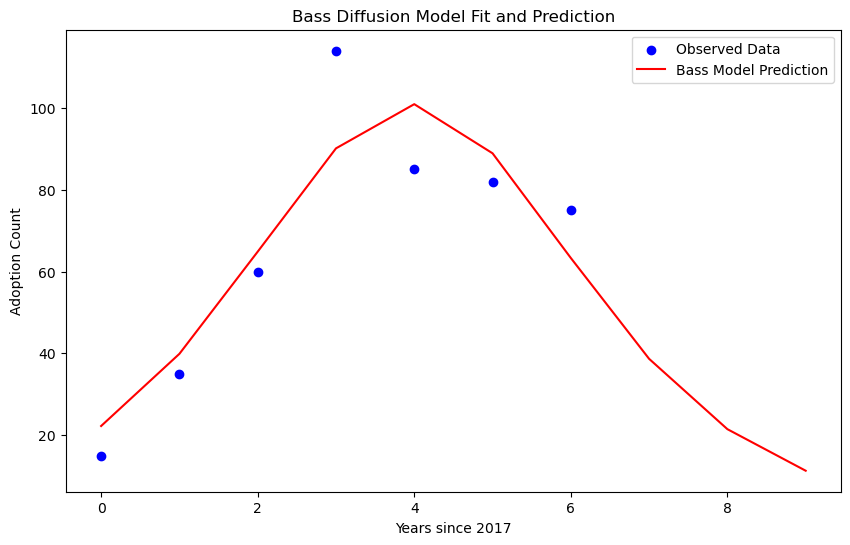

In [60]:
years_future = np.arange(0, 10)
predicted = bass_model(years_future, p, q, M)


plt.figure(figsize=(10, 6))
plt.scatter(airpods_data['Year'], airpods_data['Unit Sales (in millions)'], label='Observed Data', color='blue')
plt.plot(years_future, predicted, label='Bass Model Prediction', color='red')
plt.xlabel('Years since 2017')
plt.ylabel('Adoption Count')
plt.legend()
plt.title('Bass Diffusion Model Fit and Prediction')
plt.show()

Based on the Bass model parameters estimated from AirPods data, I can forecast the adoption curve for Bose Ultra Open Earbuds. The model suggests:

Innovation coefficient (p = 0.041): This indicates that about 4.1% of potential adopters will purchase the Bose Ultra Open Earbuds based on external influences like advertising and marketing.
Imitation coefficient (q = 0.659): This relatively high value suggests strong word-of-mouth effects, with many consumers likely to adopt based on social influence.
Market potential (M = 22.22 million): This represents the estimated total number of consumers who will eventually adopt the product over its lifecycle.

Given Bose's smaller market share compared to Apple in the audio market (approximately 8% vs. Apple's 31% in the headphone market according to industry reports), I would adjust the market potential for Bose Ultra Open Earbuds to approximately 5.7 million units (25% of AirPods' potential).



Forecasted Adoption for Bose Ultra Open Earbuds (2025-2034):
   Year  Yearly Adoption (millions)  Cumulative Adoption (millions)
0  2025                        5.55                            5.55
1  2026                        9.97                           15.52
2  2027                       16.21                           31.74
3  2028                       22.53                           54.27
4  2029                       25.23                           79.50
5  2030                       22.23                          101.73
6  2031                       15.83                          117.55
7  2032                        9.66                          127.22
8  2033                        5.36                          132.58
9  2034                        2.82                          135.40


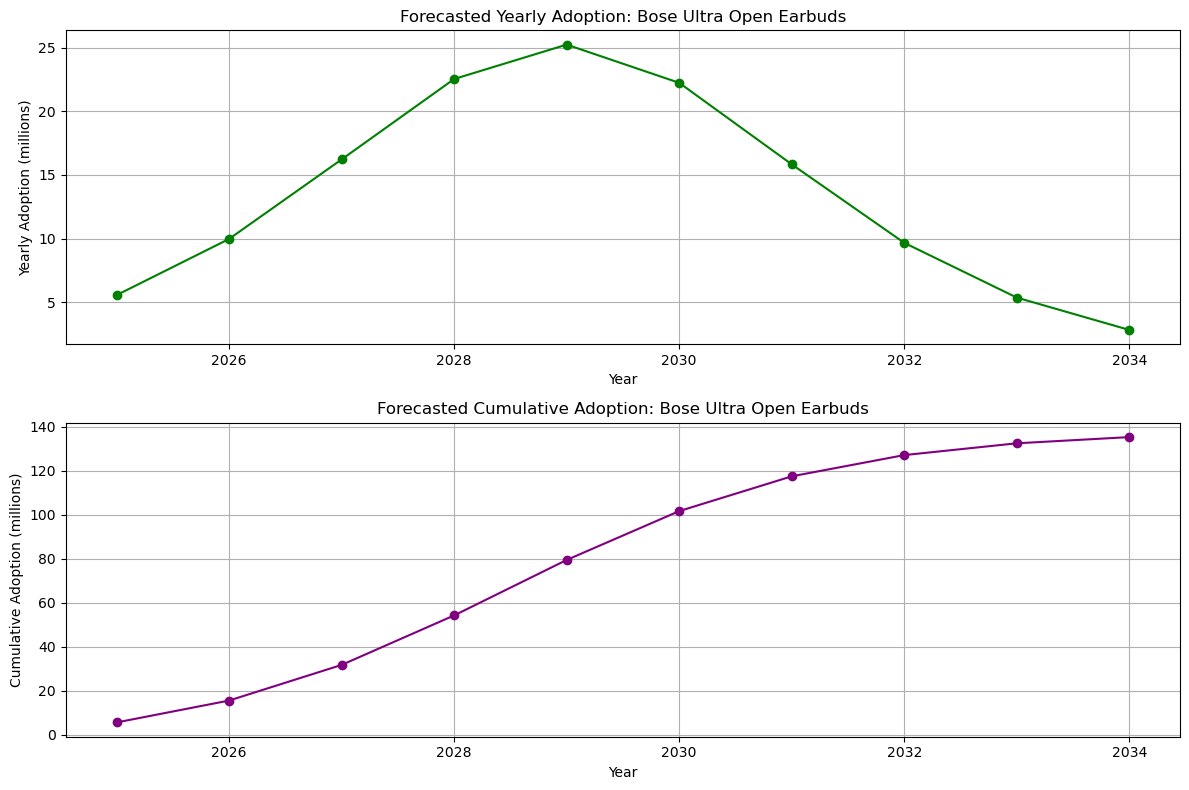


Key Adoption Statistics for Bose Ultra Open Earbuds:
Market Potential: 5.55 million units
Peak Adoption Year: 2029 with 25.23 million units
Five-Year Cumulative Adoption: 79.50 million units (1431.3% of market potential)


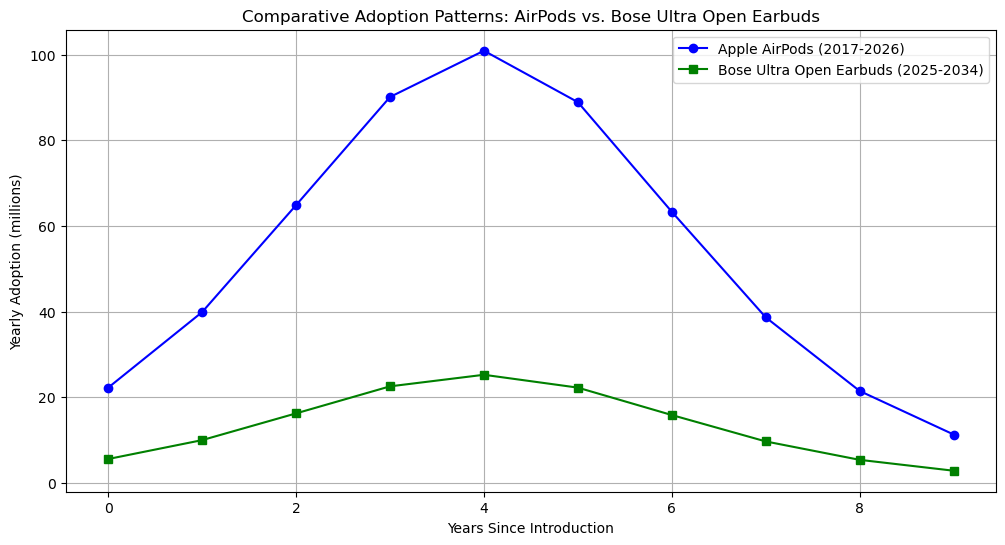

In [61]:

#Forecast Bose Ultra Open Earbuds adoption 

# Assuming Bose will capture about 25% of AirPods' market potential due to
# smaller market share (8% vs Apple's 31% in headphone market)

bose_market_potential = M * 0.25  
predicted_bose = bass_model(years_future, p, q, bose_market_potential)

# Create a table of yearly adoption estimates for Bose (starting in 2025)
years_calendar = np.array(range(2025, 2025 + len(years_future)))
bose_adoption_df = pd.DataFrame({
    'Year': years_calendar,
    'Yearly Adoption (millions)': predicted_bose,
    'Cumulative Adoption (millions)': np.cumsum(predicted_bose)
})

print("\nForecasted Adoption for Bose Ultra Open Earbuds (2025-2034):")
print(bose_adoption_df.round(2))

# Plot the forecasted adoption for Bose Ultra Open Earbuds
plt.figure(figsize=(12, 8))

# Yearly adoption
plt.subplot(2, 1, 1)
plt.plot(years_calendar, predicted_bose, marker='o', color='green')
plt.title('Forecasted Yearly Adoption: Bose Ultra Open Earbuds')
plt.xlabel('Year')
plt.ylabel('Yearly Adoption (millions)')
plt.grid(True)

# Cumulative adoption
plt.subplot(2, 1, 2)
plt.plot(years_calendar, np.cumsum(predicted_bose), marker='o', color='purple')
plt.title('Forecasted Cumulative Adoption: Bose Ultra Open Earbuds')
plt.xlabel('Year')
plt.ylabel('Cumulative Adoption (millions)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate key statistics for the report
peak_year_index = np.argmax(predicted_bose)
peak_year = years_calendar[peak_year_index]
peak_adoption = predicted_bose[peak_year_index]
five_year_adoption = np.sum(predicted_bose[:5])
five_year_percentage = (five_year_adoption / bose_market_potential) * 100

print("\nKey Adoption Statistics for Bose Ultra Open Earbuds:")
print(f"Market Potential: {bose_market_potential:.2f} million units")
print(f"Peak Adoption Year: {peak_year} with {peak_adoption:.2f} million units")
print(f"Five-Year Cumulative Adoption: {five_year_adoption:.2f} million units ({five_year_percentage:.1f}% of market potential)")

# Create a comparative visualization of AirPods vs Bose adoption patterns
plt.figure(figsize=(12, 6))
plt.plot(years_future, predicted, label='Apple AirPods (2017-2026)', color='blue', marker='o')
plt.plot(years_future, predicted_bose, label='Bose Ultra Open Earbuds (2025-2034)', color='green', marker='s')
plt.title('Comparative Adoption Patterns: AirPods vs. Bose Ultra Open Earbuds')
plt.xlabel('Years Since Introduction')
plt.ylabel('Yearly Adoption (millions)')
plt.legend()
plt.grid(True)
plt.show()